# `VC` Práctica 0

> Alumno: Miguel Ángel Fernández Gutiérrez
>
> Correo: [mianfg@correo.ugr.es](mailto:mianfg@correo.ugr.es)
> 
> Grupo: VC1

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2, numpy as np, math

In [ ]:
import os
get_image = lambda route: os.path.join('./', route)

Mounted at /content/gdrive


### Ejercicio 1

Escribir una función que lea el fichero de una imagen y permita mostrarla
tanto en grises como en color (`im=leeimagen(filename, flagColor)`).
`flagColor` es la variable que determina si la imagen se muestra en escala
de grises o en color.

#### Solución

Creamos la función pedida. Dependiendo del valor de `flagColor` tendremos una imagen en blanco y negro (si es `0`) o a color (si es `1`). Por defecto, la omisión del parámetro `flagColor` hace que sea `flagColor=1` (a color).

In [ ]:
def leeimagen(filename, flagColor=1):
  im = cv2.imread(filename, flagColor)
  return cv2.cvtColor(im, cv2.COLOR_BGR2RGB) if flagColor == 1 else im

Visualizamos la imagen a color:

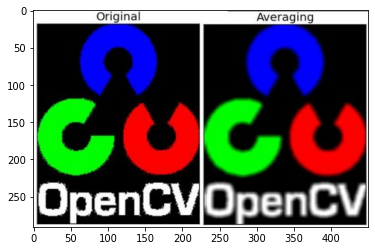

In [ ]:
im_color = leeimagen(get_image('./images/logoOpenCV.jpg'), 1)
plt.imshow(im_color)
plt.show()

Visualizamos la imagen en blanco y negro:

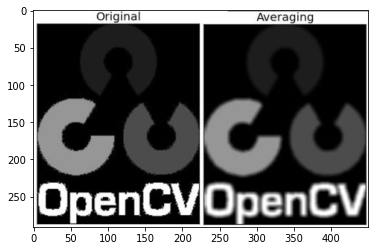

In [ ]:
im_bn = leeimagen(get_image('./images/logoOpenCV.jpg'), 0)
plt.imshow(im_bn, cmap="gray")
plt.show()

---

### Ejercicio 2

Escribir una función que permita visualizar una matriz de números reales
cualquiera/arbitraria, tanto monobanda como tribanda (`pintaI(im)`). Para
ello se deberá escalar el rango de cada banda al intervalo [0,1] sin pérdida
de información.

#### Solución

In [ ]:
def pintaI(im, normalize=Trueshow=True):
  """
  Pintar una imagen en monobanda o tribanda

  Parámetros
  ----------
  im : np.array
    Una matriz:
     - de shape (m, n) si es para imagen monobanda (ancho x alto)
     - de shape (m, n, 3) si es para imagen tribanda en formato RGB (ancho x alto x RxGxB)
    La matriz debe tener al menos una entrada.
  """

  # primero normalizamos a [0,1]
  min, max = np.amin(im), np.amax(im)
  im = (im - min) / (max - min)

  if len(np.shape(im)) == 3:
    # im es tribanda
    plt.imshow(im)
  else:
    # im es monobanda
    plt.imshow(im, cmap='gray')
  
  plt.xticks([]), plt.yticks([]) # eliminamos numeración
  if show: plt.show()

Vamos a probar esta función de dos formas. Por una parte, crearemos matrices aleatorias y las representaremos.

In [ ]:
rand_mono = np.random.randint(low=0, high=255, size=(50, 50))
rand_multi = np.random.randint(low=0, high=255, size=(50, 50, 3))

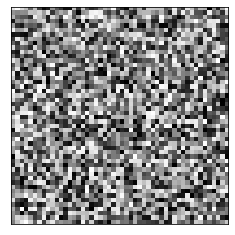

In [ ]:
pintaI(rand_mono)

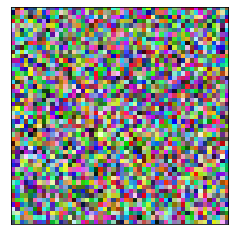

In [ ]:
pintaI(rand_multi)

Probaremos ahora con las imágenes proporcionadas. Probaremos con las imágenes que ya leímos en el ejercicio anterior.

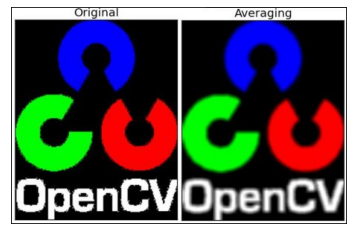

In [ ]:
pintaI(im_color)

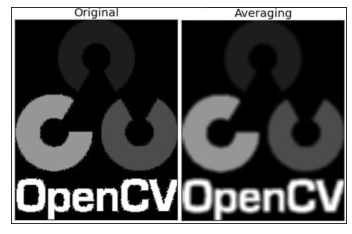

In [ ]:
pintaI(im_bn)

---

### Ejercicio 3

Escribir una función que visualice varias imágenes distintas a la vez
(concatenando las imágenes en una última imagen final): `pintaMI(vim)`.
(`vim` será una secuencia de imágenes) ¿Qué pasa si las imágenes no son
todas del mismo tipo (nivel de gris, color, blanco-negro)?

#### Solución

Crearemos una función que irá acoplando las imágenes de izquierda a derecha y alineándolas en la parte inferior.

In [ ]:
def pintaMI(vim):
  # insertar el color 
  max_height = max(im.shape[0] for im in vim)
  vim_extended = [np.vstack((np.zeros([max_height - im.shape[0], im.shape[1]] + ([3] if len(im.shape) == 3 else [])), im)) for im in vim]

  im_concatenated = np.concatenate(vim_extended, axis=1)
  return pintaI(im_concatenated)

In [ ]:
im_color_2 = leeimagen(get_image('./images/orapple.jpg'))
im_color_3 = leeimagen(get_image('./images/dave.jpg'))

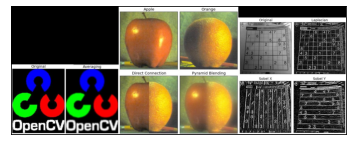

In [ ]:
pintaMI([im_color, im_color_2, im_color_3])

Nuestra función es capaz de mostrar una concatenación de imágenes multibanda o de imágenes monobanda, es decir, deben tener todas el mismo formato. En caso de que las mezclemos la función `pintaI` interpretará que la imagen completa es del tipo de la primera imagen insertada (dado que lee el primer píxel para hacer la comprobación), y lanzará una excepción una vez que encuentre un elemento de la matriz que no sea del tipo esperado.

Veamos a continuación cómo, en efecto, esta función también logra concatenar imágenes monobanda:

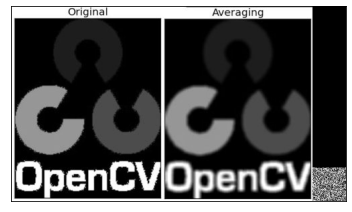

In [ ]:
pintaMI([im_bn, rand_mono])

---

### Ejercicio 4

Escribir una función que modifique el color en la imagen de cada uno de
los elementos de una lista de coordenadas de píxeles. En concreto, los
alumnos deben insertar un cuadrado azul de 100x100 pixeles en el centro
de la imagen a modificar. 

#### Solución

Creamos una función para implementar la funcionalidad buscada. Esta procederá del siguiente modo:

1. En primer lugar, buscamos la localización de la esquina superior izquierda del cuadrado.
2. A continuación, coloreamos de azul (por defecto, aunque puede ser otro color) el cuadrado de 100x100 que describe tal esquina.

En caso de que la imagen tenga un ancho o un alto inferior a 100px, se pintarán todos los píxeles posibles, sin redimensionarla ni causar una excepción.

> **Nota:** He sobreentendido que esta función es para imágenes multibanda, dado que el azul no puede describirse en monobanda.

In [ ]:
def insertar_cuadrado(im, color=[0, 0, 255]):
  im = im.copy() # copia
  
  # calculamos dónde comienza el cuadrado de 100x100
  # (desde la esquina superior izquierda)
  x, y = int((im.shape[0] - 100)/2), int((im.shape[1] - 100)/2)
  x = 0 if x < 0 else x
  y = 0 if y < 0 else y

  for i in range(x, x+100):
    for j in range(y, y+100):
      if i < im.shape[0] and j < im.shape[1]:
        im[i][j] = color
  
  return im

Un ejemplo con una imagen de tamaño mayor a 100x100:

In [ ]:
im_color_con_cuadrado = insertar_cuadrado(im_color)

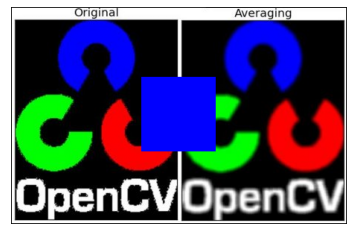

In [ ]:
pintaI(im_color_con_cuadrado)

En el caso de esta imagen de tamaño 50x50 se pintará toda de azul:

In [ ]:
rand_multi_con_cuadrado = insertar_cuadrado(rand_multi)

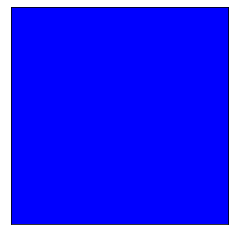

In [ ]:
pintaI(rand_multi_con_cuadrado)

---

### Ejercicio 5

Una función que sea capaz de representar varias imágenes con sus títulos
en una misma ventana.

#### Solución

Podemos reutilizar la función `pintaI` realizada previamente. Mostraremos las imágenes en dos filas (por defecto, se modifica con el parámetro `rows`).

In [ ]:
def print_images_titles(images, titles=None, rows=2):
  c = int(math.ceil(len(images)/rows))
  r = rows
  
  for i in range(len(images)):
    plt.subplot(r, c, i+1)
    if titles:
      plt.title(titles[i])
    pintaI(images[i], show=False)
  plt.show()

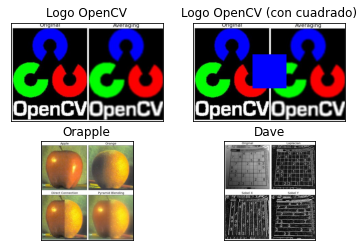

In [ ]:
print_images_titles([im_color, im_color_con_cuadrado, im_color_2, im_color_3], ["Logo OpenCV", "Logo OpenCV (con cuadrado)", "Orapple", "Dave"])

In [ ]:
+[1,2,3]

TypeError: ignored

In [ ]:
3..7

SyntaxError: ignored